In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import datasets
from keras.ops import expand_dims
from keras.utils import to_categorical
from keras import Sequential, Input, layers
from keras.callbacks import EarlyStopping

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Loading the MNIST Dataset

In [ ]:
# Load et split
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

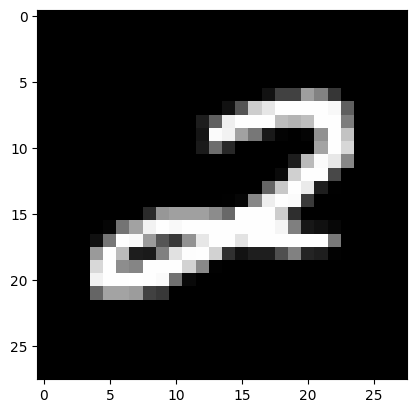

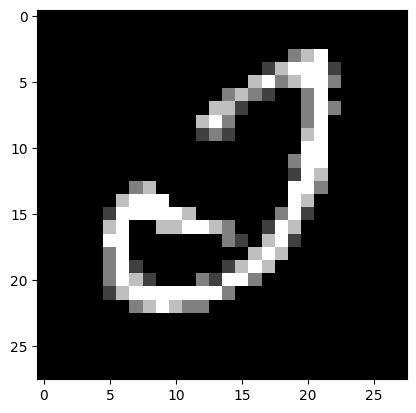

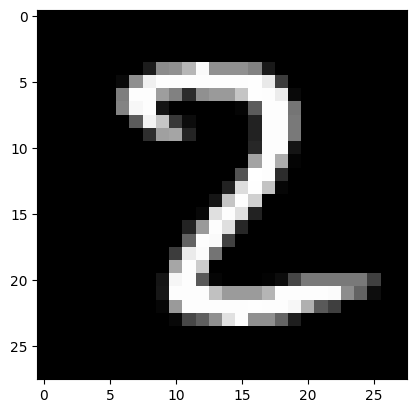

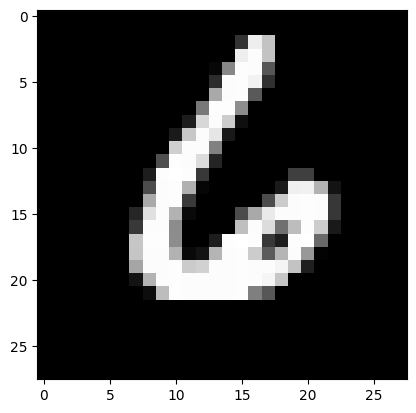

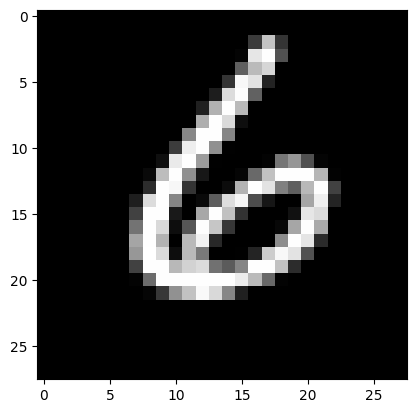

In [ ]:
# Show few random images from MNIST dataset
number_of_train_images = len(X_train)
number_of_train_images_to_show = 5 # random number
random_list_of_images_to_show = np.random.randint(0, number_of_train_images , number_of_train_images_to_show)

for i in random_list_of_images_to_show:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

## Image preprocessing

In [ ]:
# Preprocessing images by normalizing image data through division by 255 scales pixel values to the range [0, 1],
# which helps stabilize the training process, improve convergence, and enhance CNN performance.
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# Quick check the shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Add a single channel dimension for grayscale images
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
# Quick check that you correctly used to_categorical with assert
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

## Initialize my first CNN model

In [ ]:
def model_cv():
    model = Sequential()
    layers_list = [
        layers.Input(shape=(28, 28, 1)), # Input layer for 28x28 grayscale images
        layers.Conv2D(8, (4, 4), activation='relu', padding='same'), # first convolutional layer with small filter (8) to capture basic features
        layers.MaxPool2D(pool_size=(2, 2)), # Max pooling to reduce spatial dimensions
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'), # second layer with double filter from the first in order to capture more complex features
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(), # Flatten the output for the dense layers
        layers.Dense(10, activation='relu'), # Fully connected layer with ReLu activation
        layers.Dense(10, activation='softmax') # Output layer with softmax for multi-class classification
    ]
    for layer in layers_list:
        model.add(layer)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# Set up K-fold Cross Validation for robust evaluation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []

# Add early stopping to prevent overfitting
es = EarlyStopping(patience = 5)

for train, test in kfold.split(X_train, y_train):
    model = model_cv()
    history = model.fit(X_train, # train on the training split
                    y_train_cat, # y_train encoded with to_categorical
                    validation_split = 0.3, # validate on the validation split
                    batch_size = 32,
                    epochs = 10, # Experiment with different epochs :1, 5 and 10
                    callbacks = [es],
                    verbose = 1)
    scores = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    accuracies.append(scores[1] * 100)
    fold_no += 1

print(f'Average accuracy: {np.mean(accuracies)}%')

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.6746 - loss: 0.9661 - val_accuracy: 0.9253 - val_loss: 0.2459
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9353 - loss: 0.2152 - val_accuracy: 0.9482 - val_loss: 0.1727
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9561 - loss: 0.1471 - val_accuracy: 0.9588 - val_loss: 0.1393
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9659 - loss: 0.1171 - val_accuracy: 0.9646 - val_loss: 0.1214
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9725 - loss: 0.0960 - val_accuracy: 0.9684 - val_loss: 0.1056
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9761 - loss: 0.0832 - val_accuracy: 0.9716 - val_loss: 0.0953
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9776 - loss: 0.0714 - val_accuracy: 0.9732 - val_loss: 0.0871
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9816 -

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,794 (108.57 KB)

 Trainable params: 9,264 (36.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,530 (72.39 KB)

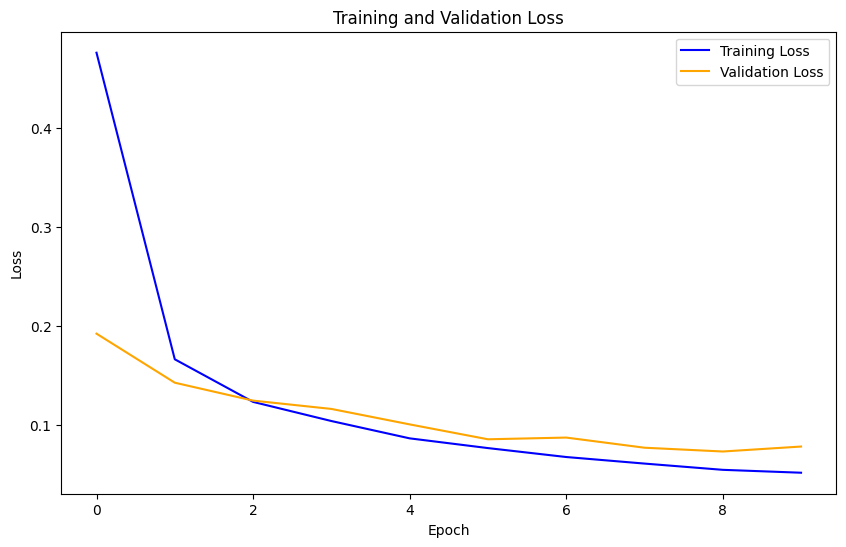

In [ ]:
# Function to visualise the training and validation loss over epochs
def plot_loss(history):
  '''
  This function plots the training and validation loss over epochs to help
  visualize the training progress and potential overfitting.

  Parameters :
  history (History) : the training history object returned by the model.fit() method.
  '''
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Training Loss', color='blue')
  plt.plot(history.history['val_loss'], label='Validation Loss', color ='orange')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()

# Call the function with model's training history to visualize the loss curves
plot_loss(history)

In [ ]:
res = model.evaluate(X_test, y_test_cat, verbose = 1 )
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9779 - loss: 0.0744
The accuracy on the test set is of 98.03 %


In [ ]:
y_true = np.argmax(y_test_cat, axis=1)

# Predict the classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])

print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.96      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

